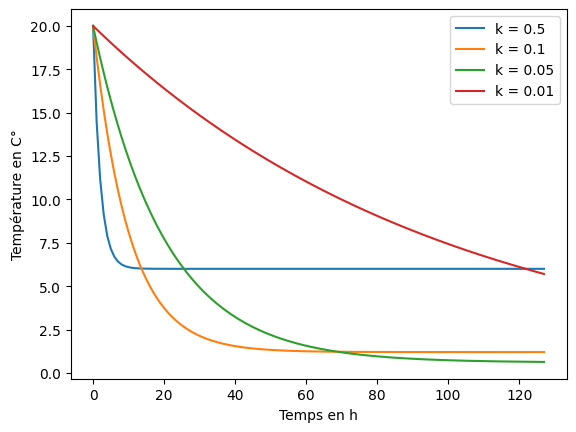

In [2]:
import math 
import matplotlib.pyplot as plt
#Question 2: l'évolution de 
T= 128 # temps maximal en heurs
theta_ext= 12  #température de l'extérieure costante en C°
theta_0= 20 #température de l'extérieure est costante en C°
k=[0.5,0.1,0.05,0.01]

def thetha(t,k):
    return (theta_0-k*theta_ext)*math.exp(-k*t)+k*thetha_ext

plotx = [t for t in range(T)]
plt.figure("évolution de la température en fonction de temps avec températeur de léxtérieur constante et une valeur intiale de la température dans le batiment" )
plt.xlabel("Temps en h")
plt.ylabel("Température en C°")

for i in k:
    plt.plot(plotx,[thetha(t,i) for t in range(T)],label="k = "+str(i))

plt.legend()
plt.show()


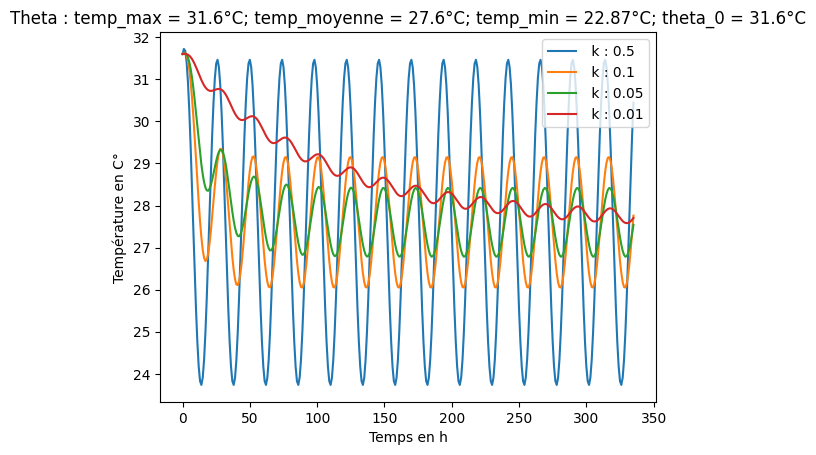

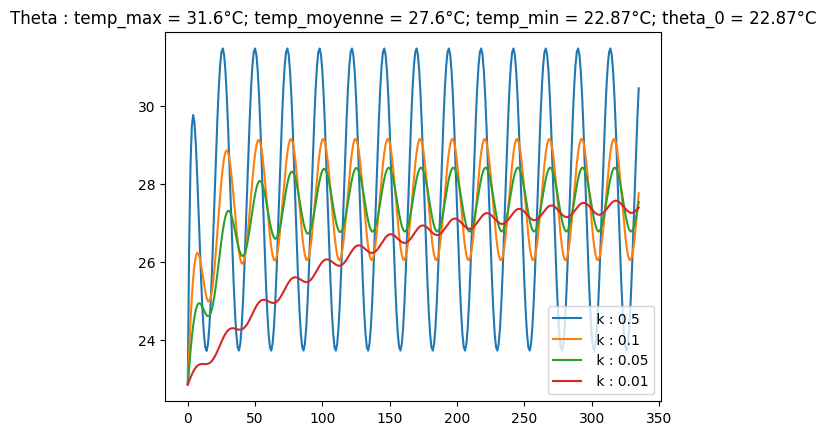

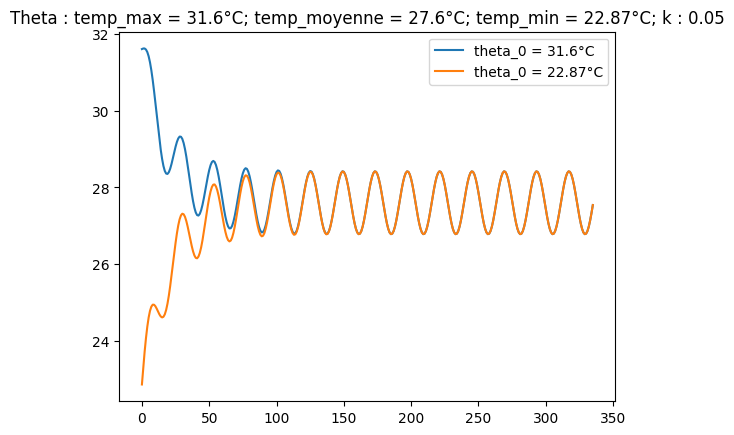

In [20]:
import math 
import matplotlib.pyplot as plt
#Question 3 : L'évolution de la température éxtérieur périodique :
T = 336             # Temps d'observation : 1 semaine en heure 
periodicite = 24  # La pulsation: donne la 24-h périodicité
val_temp_max = [31.60, 31.60]  # La température maximale attendu : b + a
val_temp_moy = [27.60, 27.60]  # La température extérieur moyenne attendu  : b
val_temp_min = [22.87, 22.87]  # La température minimale attendu : b - a
val_theta_0  = [31.60, 22.87]  # La température interérieur à l'heure la plus chaude du 1er jour
nombre_de_cas_d_etude = len(val_temp_max)
val_k = [0.5,0.1,0.05,0.01]   # Coefficient d'isolation

def theta_ext(t) : return a * math.cos(t*omega) + b  # température de l'extérieure périodique en C° en fonction de t (un temps)
def get_omega(periodicite) : return 2*math.pi/periodicite
def get_const_b(temp_moy) :  return temp_moy 
def get_const_a(temp_max,temp_min, b) :   return ((temp_max - b) + (b - temp_min))/2 
def get_const_c(k, omega, a, b, theta_0): return theta_0 - k**2 * a/(k**2 + omega**2) - b

def theta(t,temp_max,temp_min,temp_moy,theta_0,k):
    omega = get_omega(periodicite)
    b = get_const_b(temp_moy)               # Le décalage
    a = get_const_a(temp_max,temp_min, b)   # L'amplitude
    c = get_const_c(k,omega,a,b,theta_0)    # Coeficient de exp
    return c*math.exp(-k*t) + k/(k**2 + omega**2) * a * (k*math.cos(omega*t)  +  omega*math.sin(omega*t)) + b

plotx = [t for t in range(T)]
plt.figure("Évolution de la température en fonction de temps avec une témpérature extérieur périodique" )
plt.xlabel("Temps en h")
plt.ylabel("Température en C°")

def plotCaseIForDifferentK(i):
    temp_max, temp_moy, temp_min, theta_0 = val_temp_max[i], val_temp_moy[i], val_temp_min[i], val_theta_0[i] 
    b = temp_moy                            # Le décalage dans theta_ext
    a = ((temp_max - b) + (b - temp_min))/2 # L'amplitude dans theta_ext
    for k in val_k:
        plt.plot(plotx,[theta(t,temp_max,temp_min,temp_moy,theta_0,k) for t in range(T)], 
                 label= " k : " + str(k))
        plt.title( "Theta : temp_max = " + str(temp_max) + 
                 "°C; temp_moyenne = " + str(temp_moy) +
                 "°C; temp_min = " + str(temp_min) + 
                 "°C; theta_0 = " + str(theta_0) +"°C" )    
    plt.legend()
    plt.show()
    
def plotAllCases(k):
    for i in range (nombre_de_cas_d_etude):
        
        temp_max, temp_moy, temp_min, theta_0 = val_temp_max[i], val_temp_moy[i], val_temp_min[i], val_theta_0[i] 
        b = temp_moy                            # Le décalage dans theta_ext
        a = ((temp_max - b) + (b - temp_min))/2 # L'amplitude dans theta_ext
        plt.plot(plotx,[theta(t,temp_max,temp_min,temp_moy,theta_0,k) for t in range(T)], 
                 label= "theta_0 = " + str(theta_0) +"°C")
        plt.title( "Theta : temp_max = " + str(temp_max) + 
                 "°C; temp_moyenne = " + str(temp_moy) +
                 "°C; temp_min = " + str(temp_min) + 
                 "°C; k : " + str(k)  )    
    plt.legend()
    plt.show()

plotCaseIForDifferentK(0)
plotCaseIForDifferentK(1)
plotAllCases(0.05)